In [2]:
#dependencies
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

In [3]:
#import and read csv
rain = "data/precipitation_new.csv"
rain_df = pd.read_csv(rain)

rain_df

,state,Unnamed: 1,year,month,precipitation
0,AC,1/31/1998,1998,Jan,335.5
1,AC,2/28/1998,1998,Feb,299.4
2,AC,3/31/1998,1998,Mar,396.7
3,AC,4/30/1998,1998,Apr,102.7
4,AC,5/31/1998,1998,May,19.0
...,...,...,...,...,...
5809,TO,7/31/2017,2017,Jul,0.0
5810,TO,8/31/2017,2017,Aug,0.0
5811,TO,9/30/2017,2017,Sep,0.0
5812,TO,10/31/2017,2017,Oct,21.6


In [4]:
yeargroup_df = rain_df.groupby(["year"])
precipitation = yeargroup_df.sum()["precipitation"]
p_df = pd.DataFrame(precipitation)

p_df = p_df.reset_index()
p_df

,year,precipitation
0,1998,39164.8
1,1999,41545.0
2,2000,46756.6
3,2001,34510.5
4,2002,42450.8
5,2003,41609.6
6,2004,47358.5
7,2005,45354.4
8,2006,45854.7
9,2007,40209.7


In [5]:
fire = "data/forest_fire_1998-2017_new.csv"
fire_csv = pd.read_csv(fire)
fire_csv

,Ano,State,Month,Number,Date
0,1998,AC,Jan,0,1/1/1998
1,1999,AC,Jan,0,1/1/1999
2,2000,AC,Jan,0,1/1/2000
3,2001,AC,Jan,0,1/1/2001
4,2002,AC,Jan,0,1/1/2002
...,...,...,...,...,...
6449,2012,TO,Dec,128,1/1/2012
6450,2013,TO,Dec,85,1/1/2013
6451,2014,TO,Dec,223,1/1/2014
6452,2015,TO,Dec,373,1/1/2015


In [6]:
yeargroup_df2 = fire_csv.groupby(["Ano"])
fire = yeargroup_df2.sum()["Number"]
fire_df = pd.DataFrame(fire)

fire_df = fire_df.reset_index()
fire_df

,Ano,Number
0,1998,123881
1,1999,132526
2,2000,97541
3,2001,137926
4,2002,220015
5,2003,208476
6,2004,248928
7,2005,224294
8,2006,123327
9,2007,206412


In [7]:
fire_df = fire_df.rename(columns={"Ano":"year", "Number":"Fires"})
fire_df

,year,Fires
0,1998,123881
1,1999,132526
2,2000,97541
3,2001,137926
4,2002,220015
5,2003,208476
6,2004,248928
7,2005,224294
8,2006,123327
9,2007,206412


In [8]:
merge_table = pd.merge(p_df, fire_df, on="year")
merge_table

,year,precipitation,Fires
0,1998,39164.8,123881
1,1999,41545.0,132526
2,2000,46756.6,97541
3,2001,34510.5,137926
4,2002,42450.8,220015
5,2003,41609.6,208476
6,2004,47358.5,248928
7,2005,45354.4,224294
8,2006,45854.7,123327
9,2007,40209.7,206412


<IPython.core.display.Javascript object>


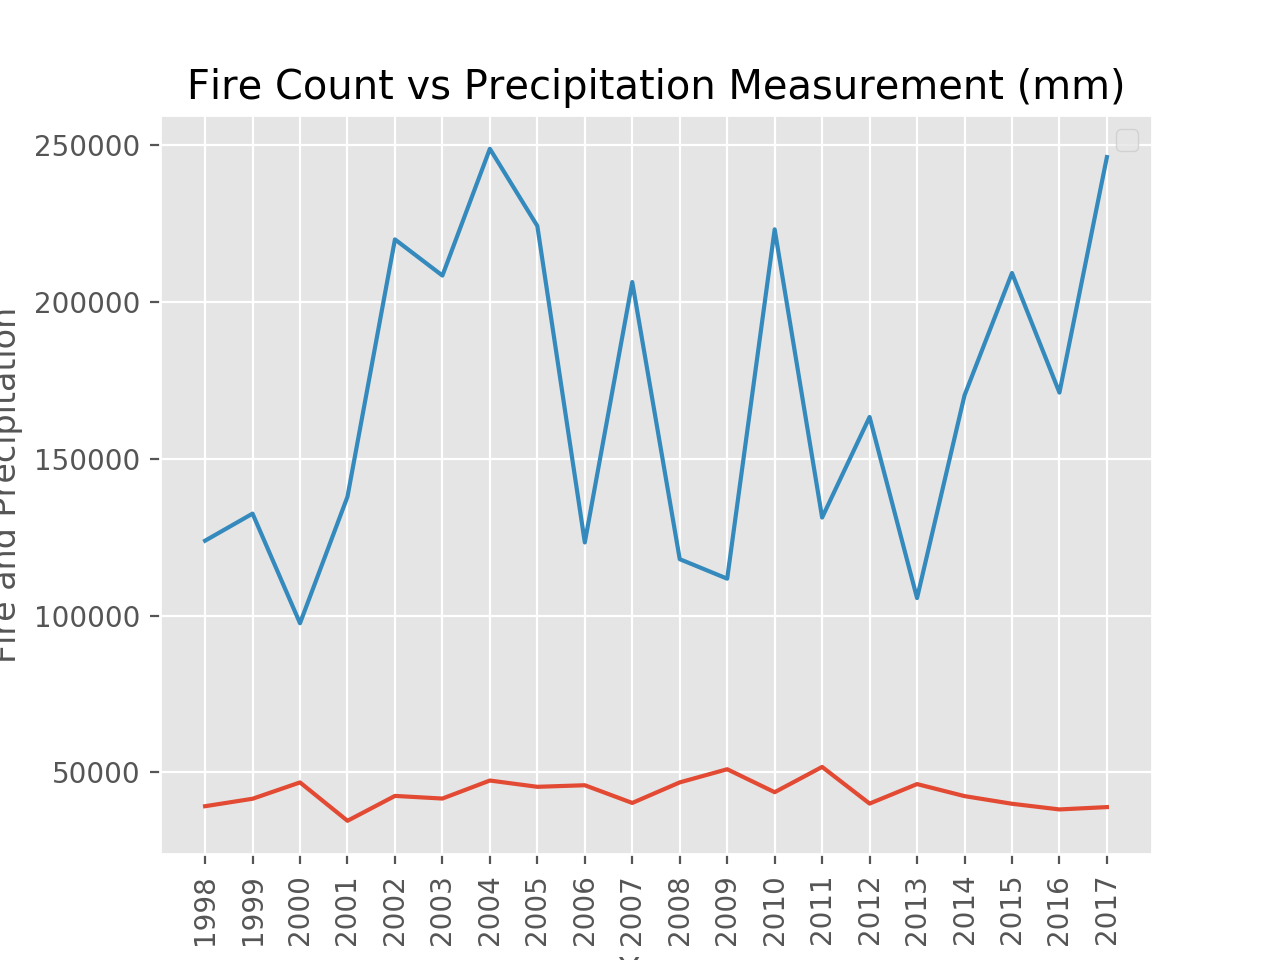

No handles with labels found to put in legend.


In [9]:
plt.plot(merge_table.year, merge_table.precipitation)
plt.plot(merge_table.year, merge_table.Fires)

tick_locations = [value for value in merge_table.year]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

plt.title('Fire Count vs Precipitation Measurement (mm)')
plt.xlabel('Year')
plt.ylabel('Fire and Precipitation')

plt.legend()
plt.show()

In [10]:
state_fire = fire_csv.groupby(["State"])
fire_average = state_fire.mean()["Number"]
fire_average_df = pd.DataFrame(fire_average)

fire_average_df = fire_average_df.reset_index()
fire_average_df

,State,Number
0,AC,285.962343
1,AL,19.350000
2,AM,491.493724
3,AP,105.087866
4,BA,949.702929
5,CE,335.405858
6,DF,14.899582
7,ES,27.389121
8,GO,468.493724
9,MA,1570.205021


In [11]:
fire_average_df = fire_average_df.rename(columns={"State":"state", "Number":"Number of Fires"})
fire_average_df

,state,Number of Fires
0,AC,285.962343
1,AL,19.350000
2,AM,491.493724
3,AP,105.087866
4,BA,949.702929
5,CE,335.405858
6,DF,14.899582
7,ES,27.389121
8,GO,468.493724
9,MA,1570.205021


In [12]:
state_rain = rain_df.groupby(["state", "year"])
rain_sum = state_rain.sum()["precipitation"]

rain_sum = pd.DataFrame(rain_sum)

rain_sum = rain_sum.reset_index()


rain_sum

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
490,TO,2013,1849.3
491,TO,2014,1843.9
492,TO,2015,1393.7
493,TO,2016,1270.5


In [13]:
rain_avg = rain_sum.groupby(["state"])
rain_average = rain_avg.mean()["precipitation"]
rain_average_df = pd.DataFrame(rain_average)

rain_average_df = rain_average_df.reset_index()
rain_average_df

,state,precipitation
0,AC,1983.965000
1,AL,1695.150000
2,AM,2315.250000
3,AP,2471.790000
4,BA,1836.790000
5,CE,1490.330000
6,DF,1453.055000
7,ES,1250.695000
8,GO,1608.100000
9,MA,2080.505000


In [14]:
merge_average = pd.merge(fire_average_df, rain_average_df, on="state")
merge_average

,state,Number of Fires,precipitation
0,AC,285.962343,1983.965000
1,AL,19.350000,1695.150000
2,AM,491.493724,2315.250000
3,AP,105.087866,2471.790000
4,BA,949.702929,1836.790000
5,CE,335.405858,1490.330000
6,DF,14.899582,1453.055000
7,ES,27.389121,1250.695000
8,GO,468.493724,1608.100000
9,MA,1570.205021,2080.505000


<IPython.core.display.Javascript object>


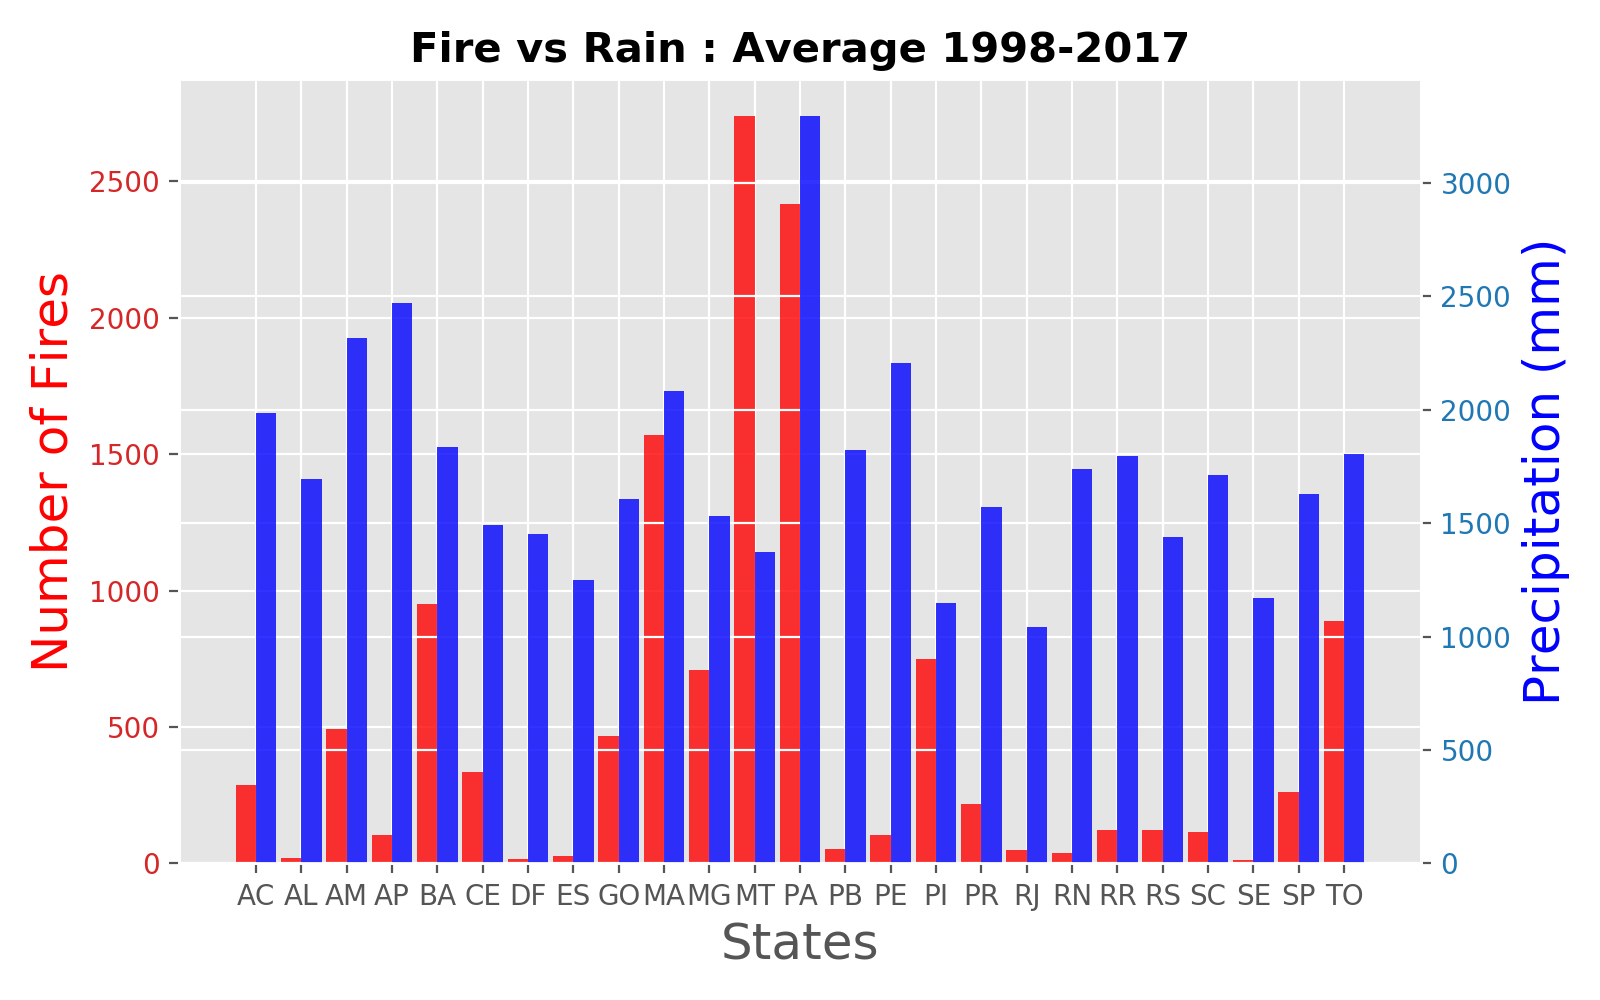

In [15]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(8, 5))

# Deforestation
for index, row in merge_average.iterrows():
    def_graph = ax1.bar(merge_average["state"][index], merge_average["Number of Fires"][index],  color='r', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Fire vs Rain : Average 1998-2017", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("States",fontsize = 18)
ax1.set_ylabel("Number of Fires",fontsize = 18, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red')

# Rain
ax2 = ax1.twinx()
for index, row in merge_average.iterrows():
    rain_graph = ax2.bar(merge_average["state"][index], merge_average["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("Precipitation (mm)",fontsize = 18, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')

#other configurations
#plt.xticks(tick_locations, rotation=90)
plt.tight_layout()
#ax.grid()
#save figure
plt.savefig("Fire vs Rain - Annual Average.png", dpi=fig.dpi)
plt.show()

In [16]:
rain_amazon = rain_sum[rain_sum['state'].str.contains("AC")|\
               rain_sum['state'].str.contains("AM")|\
               rain_sum['state'].str.contains("AP")|\
               rain_sum['state'].str.contains("MA")|\
               rain_sum['state'].str.contains("MT")|\
               rain_sum['state'].str.contains("PA")|\
               rain_sum['state'].str.contains("RO")|\
               rain_sum['state'].str.contains("RR")|\
               rain_sum['state'].str.contains("TO")]
rain_amazon

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
490,TO,2013,1849.3
491,TO,2014,1843.9
492,TO,2015,1393.7
493,TO,2016,1270.5


In [17]:
fire_sum = fire_csv.groupby(["State", "Ano"])
fire_sum = fire_sum.sum()["Number"]
fire_sum_df = pd.DataFrame(fire_sum)

fire_sum_df = fire_sum_df.reset_index()

fire_sum_df

,State,Ano,Number
0,AC,1998,730
1,AC,1999,333
2,AC,2000,434
3,AC,2001,828
4,AC,2002,3491
...,...,...,...
535,TO,2013,8127
536,TO,2014,7748
537,TO,2015,9123
538,TO,2016,14854


In [18]:
new_fire_sum = fire_sum_df.rename(columns={"State":"state", "Number":"Number of Fires", "Ano":"year"})
new_fire_sum

,state,year,Number of Fires
0,AC,1998,730
1,AC,1999,333
2,AC,2000,434
3,AC,2001,828
4,AC,2002,3491
...,...,...,...
535,TO,2013,8127
536,TO,2014,7748
537,TO,2015,9123
538,TO,2016,14854


In [19]:
fire_amazon = new_fire_sum[new_fire_sum['state'].str.contains("AC")|\
               new_fire_sum['state'].str.contains("AM")|\
               new_fire_sum['state'].str.contains("AP")|\
               new_fire_sum['state'].str.contains("MA")|\
               new_fire_sum['state'].str.contains("MT")|\
               new_fire_sum['state'].str.contains("PA")|\
               new_fire_sum['state'].str.contains("RO")|\
               new_fire_sum['state'].str.contains("RR")|\
               new_fire_sum['state'].str.contains("TO")]
fire_amazon

,state,year,Number of Fires
0,AC,1998,730
1,AC,1999,333
2,AC,2000,434
3,AC,2001,828
4,AC,2002,3491
...,...,...,...
535,TO,2013,8127
536,TO,2014,7748
537,TO,2015,9123
538,TO,2016,14854


In [20]:
merge_amazon_df = pd.merge(fire_amazon, rain_amazon, on=["state","year"])
merge_amazon_df

,state,year,Number of Fires,precipitation
0,AC,1998,730,2296.1
1,AC,1999,333,2182.2
2,AC,2000,434,1703.5
3,AC,2001,828,1926.9
4,AC,2002,3491,1909.9
...,...,...,...,...
155,TO,2013,8127,1849.3
156,TO,2014,7748,1843.9
157,TO,2015,9123,1393.7
158,TO,2016,14854,1270.5


In [21]:
merge2 = merge_amazon_df.groupby(["year"])
merge2_df = merge2.sum()
merge_amazon = pd.DataFrame(merge2_df)

merge_amazon = merge_amazon.reset_index()

merge_amazon

,year,Number of Fires,precipitation
0,1998,82676,16444.3
1,1999,81896,18499.7
2,2000,61698,18510.7
3,2001,87789,16345.5
4,2002,133049,15949.3
5,2003,115997,15834.6
6,2004,169782,17218.5
7,2005,132937,16782.1
8,2006,80497,19357.0
9,2007,114561,17513.3


In [22]:
x_axis = list(merge_amazon.year)

<IPython.core.display.Javascript object>


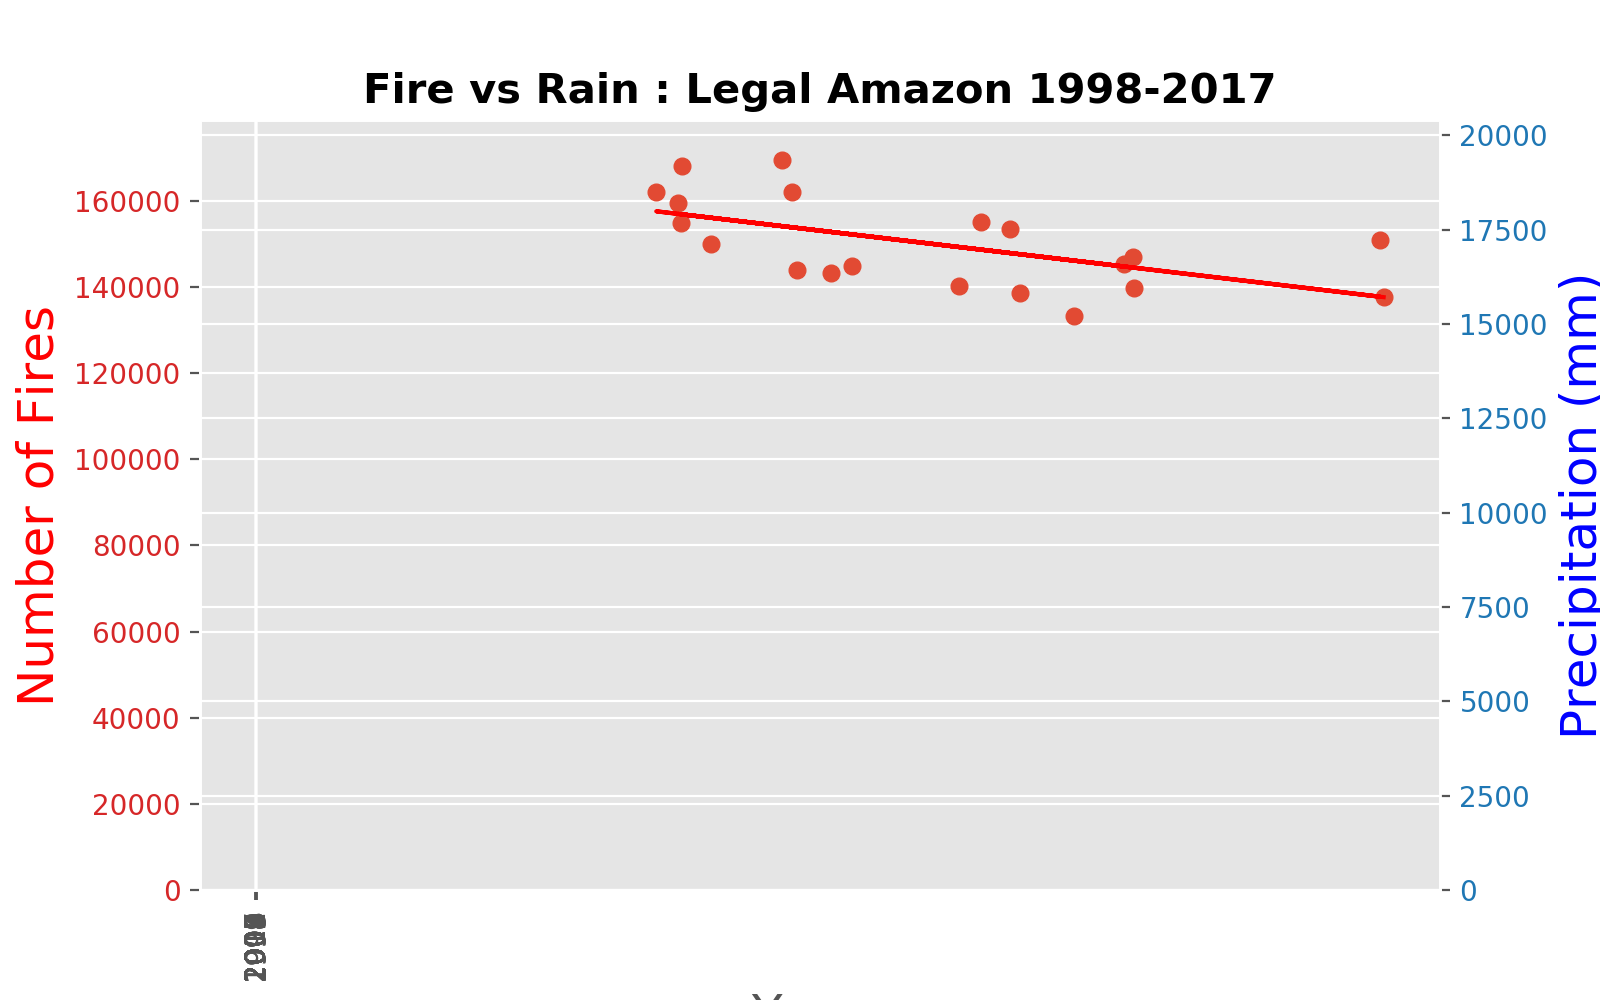

In [23]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(8, 5))
plt.xticks(tick_locations, x_axis, rotation=90)
# Deforestation
for index, row in merge_amazon.iterrows():
    def_graph = ax1.bar(merge_amazon["year"][index], merge_amazon["Number of Fires"][index],  color='r', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Fire vs Rain : Legal Amazon 1998-2017", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("Years",fontsize = 18)
ax1.set_ylabel("Number of Fires",fontsize = 18, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red')

# Rain
ax2 = ax1.twinx()
for index, row in merge_amazon.iterrows():
    rain_graph = ax2.bar(merge_amazon["year"][index], merge_amazon["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("Precipitation (mm)",fontsize = 18, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')

# x_axis = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
# # print(tick_locations)
# plt.tight_layout()
#ax.grid()
#save figure
plt.savefig("Fire vs Rain Legal Amazon.png", dpi=fig.dpi)
plt.show()

In [24]:
#linear regression
X = merge_amazon['Number of Fires'].values.reshape(-1, 1)
Y = merge_amazon['precipitation'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)
# correlation matrices
#correlation coefficient

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print(linear_regressor.coef_)
# Correlation Coefficient
# and R-square
merge_amazon.corr(method ='pearson')

model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())

[[-0.02095198]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              142.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                    2.85e-10
Time:                        18:20:25   Log-Likelihood:                         -238.79
No. Observations:                  20   AIC:                                      479.6
Df Residuals:                      19   BIC:                                      480.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------